## Vectors

Vectors are useful since they help us summarize information about an object using numbers. Then, using the number representation, we can make comparisons between the vector representations of different objects.

Say you are working at a school and want to analyze student scores.
Take a look at the vectors representing the student's scores plotted below. What do you notice? Are they close together? How similar is the vector for Alena’s scores to Xavier’s and Niko’s?

In [2]:
import numpy as np
import matplotlib.pyplot as plt

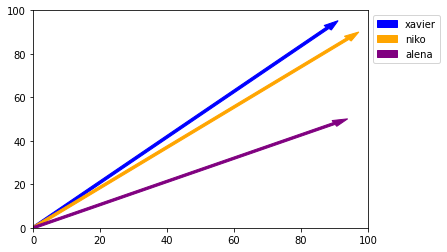

In [3]:
scores_xavier = np.array([88,92])
scores_niko   = np.array([94,87])
scores_alena  = np.array([90,48])

plt.arrow(0, 0, scores_xavier[0], scores_xavier[1], width=1, color='blue', label='xavier')
plt.arrow(0, 0, scores_niko[0],   scores_niko[1], width=1, color='orange', label='niko')
plt.arrow(0, 0, scores_alena[0],  scores_alena[1], width=1, color='purple', label='alena')

plt.axis([0, 100, 0, 100])
plt.legend(bbox_to_anchor=(1,1), loc='upper left')

### Distance

There are a variety of ways to find the distance between vectors, and here we will cover three.

1. <ins>Manhattan distance</ins>  
    Manhattan distance, also known as city block distance, is defined as the sum of the differences across each individual dimension of the vectors. Consider the vectors [1,2,3] and [2,4,6]. We can calculate the Manhattan distance between them as shown below:

        manhattan distance = ∣1−2∣ + ∣2−4∣ + ∣3−6∣ = 1 + 2 + 3 = 6

2. <ins>Euclidean distance</ins>  
   In Euclidean distance, also known as straight line distance, we take the square root of the sum of the squares of the differences in each dimension.

        euclidean distance = √{(1−2)^2 + (2−4)^2 + (3−6)^2}
                           = √{14} ≈ 3.74

3. <ins>Cosine distance</ins>  
   Cosine distance is concerned with the angle between two vectors, rather than by looking at the distance between the points, or ends, of the vectors. Two vectors that point in the same direction have no angle between them, and have a cosine distance of 0. Two vectors that point in opposite directions, on the other hand, have a cosine distance of 1. For the mathematically adventurous, [you can read up on the calculation here](https://en.wikipedia.org/wiki/Cosine_similarity#Definition).

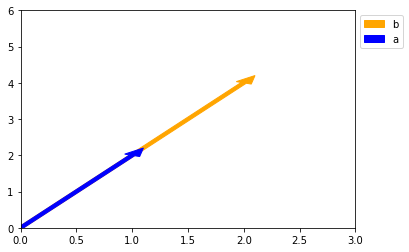

In [4]:
vector_a = np.array([1,2,3])
vector_b = np.array([2,4,6])

plt.arrow(0, 0, vector_b[0], vector_b[1], width=.05, color='orange', label='b')
plt.arrow(0, 0, vector_a[0], vector_a[1], width=.05, color='blue', label='a')

plt.axis([0, 3, 0, 6])
plt.legend(bbox_to_anchor=(1,1), loc='upper left')

In [5]:
from scipy.spatial.distance import cityblock, euclidean, cosine

In [6]:
print('Manhattan distance:', cityblock(vector_a,vector_b))
print('Euclidean distance:', euclidean(vector_a,vector_b))
print('Cosine distance:   ', cosine(vector_a,vector_b))

Manhattan distance: 6
Euclidean distance: 3.7416573867739413
Cosine distance:    0.0


When working with vectors that have a large number of dimensions, such as word embeddings, the distances calculated by Manhattan and Euclidean distance can become rather large. Thus, calculations using cosine distance are usually preferred.

## Word embeddings

* Word embeddings are vector representations of a word.  
The idea behind word embeddings is a theory known as the distributional hypothesis. This hypothesis states that words that co-occur in the same contexts tend to have similar meanings. With word embeddings, we map words that exist with the same context to similar places in our vector space (math-speak for the area in which our vectors exist). Example:

    <pre>
    The <ins>kid</ins> said he would grow up to be superman
    The <ins>child</ins> said he would grow up to be superman</pre>
    
    The words kid and child will have similar word vectors due to a similar context.  
    Note: Embedding can be considered as a synonym for encoding.<br><br>

* The numeric values that are assigned to the vector representation of a word are not important in their own right, but gather meaning from how similar or not words are to each other. Thus the cosine distance between words with similar contexts will be small, and the cosine distance between words that have very different contexts will be large.<br><br>

* We can retrieve word embeddings for english words using [spaCy](https://spacy.io/models/en):

In [7]:
import spacy

In [ ]:
!python -m spacy download en_core_web_lg

In [8]:
nlp = spacy.load('en_core_web_lg')

In [9]:
happy_vec = nlp('happy').vector
sad_vec   = nlp('sad').vector
angry_vec = nlp('angry').vector

In [10]:
len(happy_vec)

300

In [11]:
# Cosine distance
print('happy/sad:', cosine(happy_vec, sad_vec))
print('angry/sad:', cosine(angry_vec, sad_vec))

happy/sad: 0.35610121488571167
angry/sad: 0.3968866467475891


Below is a list of 1,000 most common English words:

In [12]:
most_common_words = ['a',
 'ability',
 'able',
 'about',
 'above',
 'accept',
 'according',
 'account',
 'across',
 'act',
 'action',
 'activity',
 'actually',
 'add',
 'address',
 'administration',
 'admit',
 'adult',
 'affect',
 'after',
 'again',
 'against',
 'age',
 'agency',
 'agent',
 'ago',
 'agree',
 'agreement',
 'ahead',
 'air',
 'all',
 'allow',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'American',
 'among',
 'amount',
 'analysis',
 'and',
 'animal',
 'another',
 'answer',
 'any',
 'anyone',
 'anything',
 'appear',
 'apply',
 'approach',
 'area',
 'argue',
 'arm',
 'around',
 'arrive',
 'art',
 'article',
 'artist',
 'as',
 'ask',
 'assume',
 'at',
 'attack',
 'attention',
 'attorney',
 'audience',
 'author',
 'authority',
 'available',
 'avoid',
 'away',
 'baby',
 'back',
 'bad',
 'bag',
 'ball',
 'bank',
 'bar',
 'base',
 'be',
 'beat',
 'beautiful',
 'because',
 'become',
 'bed',
 'before',
 'begin',
 'behavior',
 'behind',
 'believe',
 'benefit',
 'best',
 'better',
 'between',
 'beyond',
 'big',
 'bill',
 'billion',
 'bit',
 'black',
 'blood',
 'blue',
 'board',
 'body',
 'book',
 'born',
 'both',
 'box',
 'boy',
 'break',
 'bring',
 'brother',
 'budget',
 'build',
 'building',
 'business',
 'but',
 'buy',
 'by',
 'call',
 'camera',
 'campaign',
 'can',
 'cancer',
 'candidate',
 'capital',
 'car',
 'card',
 'care',
 'career',
 'carry',
 'case',
 'catch',
 'cause',
 'cell',
 'center',
 'central',
 'century',
 'certain',
 'certainly',
 'chair',
 'challenge',
 'chance',
 'change',
 'character',
 'charge',
 'check',
 'child',
 'choice',
 'choose',
 'church',
 'citizen',
 'city',
 'civil',
 'claim',
 'class',
 'clear',
 'clearly',
 'close',
 'coach',
 'cold',
 'collection',
 'college',
 'color',
 'come',
 'commercial',
 'common',
 'community',
 'company',
 'compare',
 'computer',
 'concern',
 'condition',
 'conference',
 'Congress',
 'consider',
 'consumer',
 'contain',
 'continue',
 'control',
 'cost',
 'could',
 'country',
 'couple',
 'course',
 'court',
 'cover',
 'create',
 'crime',
 'cultural',
 'culture',
 'cup',
 'current',
 'customer',
 'cut',
 'dark',
 'data',
 'daughter',
 'day',
 'dead',
 'deal',
 'death',
 'debate',
 'decade',
 'decide',
 'decision',
 'deep',
 'defense',
 'degree',
 'Democrat',
 'democratic',
 'describe',
 'design',
 'despite',
 'detail',
 'determine',
 'develop',
 'development',
 'die',
 'difference',
 'different',
 'difficult',
 'dinner',
 'direction',
 'director',
 'discover',
 'discuss',
 'discussion',
 'disease',
 'do',
 'doctor',
 'dog',
 'door',
 'down',
 'draw',
 'dream',
 'drive',
 'drop',
 'drug',
 'during',
 'each',
 'early',
 'east',
 'easy',
 'eat',
 'economic',
 'economy',
 'edge',
 'education',
 'effect',
 'effort',
 'eight',
 'either',
 'election',
 'else',
 'employee',
 'end',
 'energy',
 'enjoy',
 'enough',
 'enter',
 'entire',
 'environment',
 'environmental',
 'especially',
 'establish',
 'even',
 'evening',
 'event',
 'ever',
 'every',
 'everybody',
 'everyone',
 'everything',
 'evidence',
 'exactly',
 'example',
 'executive',
 'exist',
 'expect',
 'experience',
 'expert',
 'explain',
 'eye',
 'face',
 'fact',
 'factor',
 'fail',
 'fall',
 'family',
 'far',
 'fast',
 'father',
 'fear',
 'federal',
 'feel',
 'feeling',
 'few',
 'field',
 'fight',
 'figure',
 'fill',
 'film',
 'final',
 'finally',
 'financial',
 'find',
 'fine',
 'finger',
 'finish',
 'fire',
 'firm',
 'first',
 'fish',
 'five',
 'floor',
 'fly',
 'focus',
 'follow',
 'food',
 'foot',
 'for',
 'force',
 'foreign',
 'forget',
 'form',
 'former',
 'forward',
 'four',
 'free',
 'friend',
 'from',
 'front',
 'full',
 'fund',
 'future',
 'game',
 'garden',
 'gas',
 'general',
 'generation',
 'get',
 'girl',
 'give',
 'glass',
 'go',
 'goal',
 'good',
 'government',
 'great',
 'green',
 'ground',
 'group',
 'grow',
 'growth',
 'guess',
 'gun',
 'guy',
 'hair',
 'half',
 'hand',
 'hang',
 'happen',
 'happy',
 'hard',
 'have',
 'he',
 'head',
 'health',
 'hear',
 'heart',
 'heat',
 'heavy',
 'help',
 'her',
 'here',
 'herself',
 'high',
 'him',
 'himself',
 'his',
 'history',
 'hit',
 'hold',
 'home',
 'hope',
 'hospital',
 'hot',
 'hotel',
 'hour',
 'house',
 'how',
 'however',
 'huge',
 'human',
 'hundred',
 'husband',
 'I',
 'idea',
 'identify',
 'if',
 'image',
 'imagine',
 'impact',
 'important',
 'improve',
 'in',
 'include',
 'including',
 'increase',
 'indeed',
 'indicate',
 'individual',
 'industry',
 'information',
 'inside',
 'instead',
 'institution',
 'interest',
 'interesting',
 'international',
 'interview',
 'into',
 'investment',
 'involve',
 'issue',
 'it',
 'item',
 'its',
 'itself',
 'job',
 'join',
 'just',
 'keep',
 'key',
 'kid',
 'kill',
 'kind',
 'kitchen',
 'know',
 'knowledge',
 'land',
 'language',
 'large',
 'last',
 'late',
 'later',
 'laugh',
 'law',
 'lawyer',
 'lay',
 'lead',
 'leader',
 'learn',
 'least',
 'leave',
 'left',
 'leg',
 'legal',
 'less',
 'let',
 'letter',
 'level',
 'lie',
 'life',
 'light',
 'like',
 'likely',
 'line',
 'list',
 'listen',
 'little',
 'live',
 'local',
 'long',
 'look',
 'lose',
 'loss',
 'lot',
 'love',
 'low',
 'machine',
 'magazine',
 'main',
 'maintain',
 'major',
 'majority',
 'make',
 'man',
 'manage',
 'management',
 'manager',
 'many',
 'market',
 'marriage',
 'material',
 'matter',
 'may',
 'maybe',
 'me',
 'mean',
 'measure',
 'media',
 'medical',
 'meet',
 'meeting',
 'member',
 'memory',
 'mention',
 'message',
 'method',
 'middle',
 'might',
 'military',
 'million',
 'mind',
 'minute',
 'miss',
 'mission',
 'model',
 'modern',
 'moment',
 'money',
 'month',
 'more',
 'morning',
 'most',
 'mother',
 'mouth',
 'move',
 'movement',
 'movie',
 'Mr',
 'Mrs',
 'much',
 'music',
 'must',
 'my',
 'myself',
 'name',
 'nation',
 'national',
 'natural',
 'nature',
 'near',
 'nearly',
 'necessary',
 'need',
 'network',
 'never',
 'new',
 'news',
 'newspaper',
 'next',
 'nice',
 'night',
 'no',
 'none',
 'nor',
 'north',
 'not',
 'note',
 'nothing',
 'notice',
 'now',
 "n't",
 'number',
 'occur',
 'of',
 'off',
 'offer',
 'office',
 'officer',
 'official',
 'often',
 'oh',
 'oil',
 'ok',
 'old',
 'on',
 'once',
 'one',
 'only',
 'onto',
 'open',
 'operation',
 'opportunity',
 'option',
 'or',
 'order',
 'organization',
 'other',
 'others',
 'our',
 'out',
 'outside',
 'over',
 'own',
 'owner',
 'page',
 'pain',
 'painting',
 'paper',
 'parent',
 'part',
 'participant',
 'particular',
 'particularly',
 'partner',
 'party',
 'pass',
 'past',
 'patient',
 'pattern',
 'pay',
 'peace',
 'people',
 'per',
 'perform',
 'performance',
 'perhaps',
 'period',
 'person',
 'personal',
 'phone',
 'physical',
 'pick',
 'picture',
 'piece',
 'place',
 'plan',
 'plant',
 'play',
 'player',
 'PM',
 'point',
 'police',
 'policy',
 'political',
 'politics',
 'poor',
 'popular',
 'population',
 'position',
 'positive',
 'possible',
 'power',
 'practice',
 'prepare',
 'present',
 'president',
 'pressure',
 'pretty',
 'prevent',
 'price',
 'private',
 'probably',
 'problem',
 'process',
 'produce',
 'product',
 'production',
 'professional',
 'professor',
 'program',
 'project',
 'property',
 'protect',
 'prove',
 'provide',
 'public',
 'pull',
 'purpose',
 'push',
 'put',
 'quality',
 'question',
 'quickly',
 'quite',
 'race',
 'radio',
 'raise',
 'range',
 'rate',
 'rather',
 'reach',
 'read',
 'ready',
 'real',
 'reality',
 'realize',
 'really',
 'reason',
 'receive',
 'recent',
 'recently',
 'recognize',
 'record',
 'red',
 'reduce',
 'reflect',
 'region',
 'relate',
 'relationship',
 'religious',
 'remain',
 'remember',
 'remove',
 'report',
 'represent',
 'Republican',
 'require',
 'research',
 'resource',
 'respond',
 'response',
 'responsibility',
 'rest',
 'result',
 'return',
 'reveal',
 'rich',
 'right',
 'rise',
 'risk',
 'road',
 'rock',
 'role',
 'room',
 'rule',
 'run',
 'safe',
 'same',
 'save',
 'say',
 'scene',
 'school',
 'science',
 'scientist',
 'score',
 'sea',
 'season',
 'seat',
 'second',
 'section',
 'security',
 'see',
 'seek',
 'seem',
 'sell',
 'send',
 'senior',
 'sense',
 'series',
 'serious',
 'serve',
 'service',
 'set',
 'seven',
 'several',
 'sex',
 'sexual',
 'shake',
 'share',
 'she',
 'shoot',
 'short',
 'shot',
 'should',
 'shoulder',
 'show',
 'side',
 'sign',
 'significant',
 'similar',
 'simple',
 'simply',
 'since',
 'sing',
 'single',
 'sister',
 'sit',
 'site',
 'situation',
 'six',
 'size',
 'skill',
 'skin',
 'small',
 'smile',
 'so',
 'social',
 'society',
 'soldier',
 'some',
 'somebody',
 'someone',
 'something',
 'sometimes',
 'son',
 'song',
 'soon',
 'sort',
 'sound',
 'source',
 'south',
 'southern',
 'space',
 'speak',
 'special',
 'specific',
 'speech',
 'spend',
 'sport',
 'spring',
 'staff',
 'stage',
 'stand',
 'standard',
 'star',
 'start',
 'state',
 'statement',
 'station',
 'stay',
 'step',
 'still',
 'stock',
 'stop',
 'store',
 'story',
 'strategy',
 'street',
 'strong',
 'structure',
 'student',
 'study',
 'stuff',
 'style',
 'subject',
 'success',
 'successful',
 'such',
 'suddenly',
 'suffer',
 'suggest',
 'summer',
 'support',
 'sure',
 'surface',
 'system',
 'table',
 'take',
 'talk',
 'task',
 'tax',
 'teach',
 'teacher',
 'team',
 'technology',
 'television',
 'tell',
 'ten',
 'tend',
 'term',
 'test',
 'than',
 'thank',
 'that',
 'the',
 'their',
 'them',
 'themselves',
 'then',
 'theory',
 'there',
 'these',
 'they',
 'thing',
 'think',
 'third',
 'this',
 'those',
 'though',
 'thought',
 'thousand',
 'threat',
 'three',
 'through',
 'throughout',
 'throw',
 'thus',
 'time',
 'to',
 'today',
 'together',
 'tonight',
 'too',
 'top',
 'total',
 'tough',
 'toward',
 'town',
 'trade',
 'traditional',
 'training',
 'travel',
 'treat',
 'treatment',
 'tree',
 'trial',
 'trip',
 'trouble',
 'true',
 'truth',
 'try',
 'turn',
 'TV',
 'two',
 'type',
 'under',
 'understand',
 'unit',
 'until',
 'up',
 'upon',
 'us',
 'use',
 'usually',
 'value',
 'various',
 'very',
 'victim',
 'view',
 'violence',
 'visit',
 'voice',
 'vote',
 'wait',
 'walk',
 'wall',
 'want',
 'war',
 'watch',
 'water',
 'way',
 'we',
 'weapon',
 'wear',
 'week',
 'weight',
 'well',
 'west',
 'western',
 'what',
 'whatever',
 'when',
 'where',
 'whether',
 'which',
 'while',
 'white',
 'who',
 'whole',
 'whom',
 'whose',
 'why',
 'wide',
 'wife',
 'will',
 'win',
 'wind',
 'window',
 'wish',
 'with',
 'within',
 'without',
 'woman',
 'wonder',
 'word',
 'work',
 'worker',
 'world',
 'worry',
 'would',
 'write',
 'writer',
 'wrong',
 'yard',
 'yeah',
 'year',
 'yes',
 'yet',
 'you',
 'young',
 'your',
 'yourself']

len(most_common_words)

1000

and their corresponding word embedding:

In [13]:
vector_list = [nlp(x).vector for x in most_common_words]
len(vector_list)

1000

Let's check which words are the closest to "food" — by retrieving word embeddings that are the closest to its word embedding. Are you surprised?

In [14]:
def find_closest_words(word, n=10):
    global most_common_words, vector_list

    vec = vector_list[most_common_words.index(word)]

    return sorted(most_common_words,
           key=lambda x: cosine(
               vector_list[most_common_words.index(x)],
               vec
          ))[:n]

find_closest_words('food')

['food',
 'eat',
 'dinner',
 'fish',
 'health',
 'kitchen',
 'good',
 'animal',
 'water',
 'treat']

In [15]:
find_closest_words('summer')

['summer',
 'spring',
 'fall',
 'season',
 'year',
 'week',
 'day',
 'evening',
 'during',
 'last']

## Create your own Words embeddings

* Depending on the corpus of text we select to train a word embedding model, different word embeddings will be created according to the context of the words in the given corpus. The larger and more generic a corpus, the more generalizable the word embeddings become.

  So far, we have been using pre-trained word embedding models stored in spaCy. These models were trained (using word2vec) on blog posts and news articles collected by the [Linguistic Data Consortium](https://catalog.ldc.upenn.edu/LDC2013T19) at the University of Pennsylvania.<br><br>

* What if we want to train our own word embeddings?  
  Different algorithms (and models) have been developed to create word embeddings from a corpus of text:

    * [Word2Vec](https://code.google.com/archive/p/word2vec/):  
        Word2Vec was created by Google researchers (Tomas Mikolov, Kai Chen, Greg Corrado and Jefrrey Dean) in 2013. They provided a model with 300 dimensions, trained on 3 million words from Google News data. Team used skip-gram and negative sampling to build this model.<br><br>

    * [GloVe](https://nlp.stanford.edu/projects/glove/):  
      Global Vectors for word representation (GloVe) was created by Stanford researchers (Jeffrey Pennington, Richard Socher and Chris Manning) in 2014. They provided various models from 25, 50, 100, 200 to 300 dimensions based on 2, 6, 42, 840 billion tokens. Team used word-to-word co-occurrence to build this model — in other words, if two words co-occur many times, it means they have some linguistic or semantic similarity.<br><br>

    * [fastText](https://fasttext.cc/):  
        fastText was developed by Facebook. They provide 3 models with 300 dimensions each. fastText is able to achieve good performance for word representations and sentence classifications because they are making use of character level representations. Each word is represented as bag of characters n-grams in addition to the word itself. For example, for the word partial, with n=3, the fastText representation for the character n-grams is &lt;pa, art, rti, tia, ial, al&gt;. &lt;and&gt; are added as boundary symbols to separate the n-grams from the word itself.<br><br>

* Word2vec tends to be the most popular. The package [gensim](https://radimrehurek.com/gensim/) has a  Word2Vec() function that you can use to build your own word embeddings on any corpus of text you like.

In [16]:
import re
from nltk.corpus import stopwords
stopwords_en = stopwords.words('english')

def preprocess_text(txt):
    txt = re.sub('[^0-9a-zA-Z \t]', '', txt)

    return [word
            for word in txt.lower().split()
            if word not in stopwords_en]

In [17]:
docs = ['kings and queens go together',
        'men and women go together',
        'queens are women',
        'kings are men']

docs_tokenized = [preprocess_text(doc) for doc in docs]
docs_tokenized

[['kings', 'queens', 'go', 'together'],
 ['men', 'women', 'go', 'together'],
 ['queens', 'women'],
 ['kings', 'men']]

In [18]:
from gensim.models import Word2Vec

In [19]:
model = Word2Vec(
        docs_tokenized,
        size=5,          # word embeddings length
        window=5,        # window
        min_count=1,     # ignores all words with total frequency lower than this
        sg=0,            # 1 for skip-gram; otherwise CBOW
        workers=1,
        seed=1
)

In [20]:
model.wv.vectors

array([[-0.01952265,  0.04890453, -0.07217763,  0.00211847, -0.01218782],
       [ 0.01659504,  0.09549649,  0.08556271,  0.00498654,  0.03865498],
       [-0.01864961,  0.07124042, -0.05363773,  0.02688318, -0.05692117],
       [ 0.02878875,  0.09254153, -0.07922063,  0.03018967, -0.07432565],
       [ 0.02585494, -0.0624563 , -0.08489881,  0.02063094, -0.0851609 ],
       [-0.07034413, -0.01507542,  0.03600588, -0.09823549, -0.01050054]],
      dtype=float32)

In [21]:
for word in model.wv.vocab.keys():
    print("{:>8s}".format(word), model.wv[word])

   kings [-0.01952265  0.04890453 -0.07217763  0.00211847 -0.01218782]
  queens [0.01659504 0.09549649 0.08556271 0.00498654 0.03865498]
      go [-0.01864961  0.07124042 -0.05363773  0.02688318 -0.05692117]
together [ 0.02878875  0.09254153 -0.07922063  0.03018967 -0.07432565]
     men [ 0.02585494 -0.0624563  -0.08489881  0.02063094 -0.0851609 ]
   women [-0.07034413 -0.01507542  0.03600588 -0.09823549 -0.01050054]


In [22]:
model.wv.most_similar("kings", topn=3)

[('go', 0.8480280041694641),
 ('together', 0.7942909002304077),
 ('men', 0.29014742374420166)]

In [23]:
model.wv.most_similar("queens", topn=3)

[('together', -0.009249746799468994),
 ('go', -0.010827034711837769),
 ('women', -0.024528611451387405)]

In [24]:
# kings - men + women = ?
model.wv.most_similar(positive=['kings', 'women'], negative=['men'])

[('queens', 0.3920442759990692),
 ('go', 0.15889883041381836),
 ('together', -0.042504362761974335)]

It's not uncommon for research papers to report anywhere from 30% to 75% accuracy on analogy using tasks like these — where you count an analogy attempt as correct only if it guesses the exact word right.

## Visualizing word embeddings

We can't visualize a 300 dimensional feature vector.  
One of the popular things to do is to reduce it to a 2D space using t-sne.

In [25]:
from sklearn.manifold import TSNE

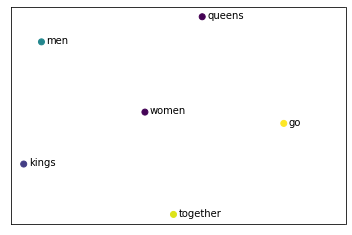

In [26]:
def tsnescatterplot_closestwords(model, word):
    vec    = model.wv[word]
    arr    = np.empty((0,len(vec)), dtype='f')

    # Add word to array
    arr    = np.append(arr, np.array([vec]), axis=0)
    labels = [word]
    scores = [0]

    # Add similar word to array
    for item in model.wv.similar_by_word(word):
        arr = np.append(arr, np.array([model.wv[item[0]]]), axis=0)
        labels.append(item[0])
        scores.append(item[1])
        
    # Reduce number of features to 2
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    X = tsne.fit_transform(arr)

    # Plot points
    x_coords = X[:, 0]
    y_coords = X[:, 1]
    plt.scatter(x_coords, y_coords, c=scores)

    # Add labels
    for label, x, y in zip(labels, x_coords, y_coords):
        plt.annotate(
            label,
            xy=(x, y),
            xytext=(5, -2),
            textcoords='offset points')

    # Remove ticks
    plt.xticks([])
    plt.yticks([])

    xlim = plt.gca().get_xlim()
    plt.xlim(xlim[0], xlim[1]+10)
    plt.show()

tsnescatterplot_closestwords(model, 'kings')

Many of the parallelogram analogy relationships will be broken by t-sne. It may hold true after a mapping through t-sne, but in most cases, because of t-sne non-linear mapping, you should not count on that.

## Storing and loading word embeddings

In [27]:
model.save("word2vec.model")

In [28]:
model = Word2Vec.load("word2vec.model")

In [29]:
len(model.wv.vocab)

6

In [30]:
model.wv.vocab.keys()

dict_keys(['kings', 'queens', 'go', 'together', 'men', 'women'])

Gensim comes with several already pre-trained moodels: https://radimrehurek.com/gensim/models/word2vec.html#usage-examples

---

## Word2Vec

Word2Vec is an algorithm to learn word embeddings, first introduced in the paper [Efficient Estimation of Word Representations in Vector Space](https://arxiv.org/pdf/1301.3781.pdf) by Mikolov et al.,2013. 

1. Let's say we have the corpus below:

        [
            "I want a glass of orange juice",
            "You want a glass of apple juice"
        ]

2. Convert the corpus to a list of tokenized word.

        [
            ["i", "want", "a", "glass", "of", "orange", "juice"],
            ["you", "want", "a", "glass", "of", "apple", "juice"]
        ]

3. Retrieve the list of unique words in this corpus.  

        ["a", "apple", "glass", "i", "juice", "of", "orange", "want", "you"]

    This list's indexes will be used as basis to one-hot encode the words in the corpus.  
    So if your corpus contains *V* unique words, each one-hot encoded vector will be 1×V dimensional. For example, the word "a", which appears first in the vocabulary, will be as the vector O<sub>1</sub> = [1,0,0,0,0,0,0,0,0]. The word "apple”, which appears second in the vocabulary, will be encoded as the vector O<sub>2</sub> = [0,1,0,0,0,0,0,0,0]. Etc.<br><br>
    
4. Select a window size, *C*. We'll take C=1.  
   In real-life applications, we usually choose a window size around 5 to 10<br><br>

5. Two different approaches are proposed:  
   * <ins>continuous bag-of-word [CBOW]</ins>:  
     predicts the current word based on the context.

     Take *C×2+1* words: the center word will be the current word and the words around are the context words. For example, for the first iteration: the context words are ("i", "a") and current word "want".  
     One-hot encode the words, then use the context words as input, and the current word as target — to be fed to a neural network.
     
     Training complexity will be:  
     `Q = (N×D + D×log2(V))`

     ![](https://i.imgur.com/Wq3kvSP.png)
    <br>

   * <ins>skip-gram [SG]</ins>:  
     predicts surrounding words given the current word.

     Select randomly a number *R* in range [1,C] and then select *R* words before and *R* words after the current word as context words.
     Increasing the range improves quality of the resulting word vectors, but it also increases the computational complexity. Since the more distant words are usually less related to the current word than those close to it, we give less weight to the distant words by sampling less from those words in our training examples.

     Each current word as input will require us to do *R×2* word classifications with *R+R* words as target.

     Training complexity will be proportional to:  
     `Q = (1×D + D×log2(V)) × C`

   So in both cases, you use a *current word* and *context words* that are one-hot encoded. In CBOW, the context words are inputs and the current word is the target. In skip-word, the current word is the input and the context words will be used as targets one after another.

   You can choose any one of the two. When using continuous skip-grams, the order of context is taken into consideration. Because of this, the time it takes to train the word embeddings is slower than when using continuous bag-of-words. In general, CBOW is preferred for smaller corpus and is faster to train, while SG is slower but gives better results for large corpus and large dimensions.<br><br>

6. With either the continuous bag-of-words or skip-grams representations as training data, word2vec then uses a shallow neural network with one hidden layer and one softmax output layer. The number of hidden nodes (D) will be the word embeddings dimension, so if your desired vector dimension is 3:

        “i” => [0.001, 0.896, 0.763]

    then the number of hidden layer node shall be 3.  
    In real-life applications, we usually choose a vector size around 300

    * <ins>Embedding matrix</ins>  
      The end goal of all of this is really just to learn the hidden layer weight matrix (noted W or E), the weights of the output layer (W') we'll just toss when we're done.

      If we take the weight matrix E (V×D) and multiply it by a single one-hot encoded vector O<sub>i</sub> (1×V), the result corresponds to the i<sup>th</sup> row (1×D). That row is going to be the embedding vector (e<sub>i</sub>) of the word corresponding to O<sub>i</sub> (O<sub>i</sub> × E = e<sub>i</sub> = i<sup>th</sup> row of E). This means that the weights of the hidden layer of this model is really just operating as a lookup table. For this reason, we also call the weight matrix of the hidden layer the *embedding matrix*.

      ![](https://i.imgur.com/PGTKYDO.png)

      Our one-hot encoded vector is a relatively high dimensional vector and most of these elements are zero so its actually not efficient to use a matrix vector multiplication to implement this — because we multiply a whole bunch of things by zeros. In practice, you would actually use a specialized function to just look up a column of the Embedding Matrix rather than do this with the matrix multiplication. In Keras for example, there's a `Embedding` layer that does just that.

   * <ins>Softmax</ins>  
     In case of a CBOW — having several word embeddings — we average the word embeddings generated by the first layer (or sum them depending on the implementation).
     Then feed it to a softmax unit, which has its own weights (W'), to classify among all *V* possible words which one is the most likely. Each output neuron (one per word in our vocabulary) will produce an output between 0 and 1 and the sum of all these output values will add up to 1. The output node with the highest probability is our prediction.

    ![](https://i.imgur.com/P8bDrUa.png)

   * We initialise the different parameters (W, W') randomly then use gradient descent to learn all the parameters by repeatedly predicting the current word given the context words (or the other way around) and tweaking the parameters through backpropagation in order to maximize the likelihood of the training set.

     Obviously, it isn't an easy learning problem, +/- 5 words around a given word could be a lot of different words. But the goal of setting this supervised learning problem isn't to do well on the supervised learning problem per se, we just want to use it to learn good word embeddings.
     And it turns out this algorithm will learn pretty decent word embeddings: if two different words have very similar contexts, then our model needs to output very similar results for these two words, and one way for the network to output similar context predictions for these two words is if the word vectors are similar. So if two words have similar contexts, then it is the algorithm incentive to learn similar word vectors for these two words (to fit the training set better), which is exactly what we want.

### Optimizations

* You may have noticed that the neural network contains a huge number of weights. For 300 features and a vocab of 10,000 words, that's 3M weights in the hidden layer and output layer each. It doesn't matter much for the first layer, since we won't actually use the entire matrix, just retrieve the rows corresponding to the inputs, but the softmax is very expensive to compute. Every time you want to evaluate the probability of a given word, you need to carry out a sum over all words in your vocabulary. A few solutions have been proposed to this:

  1. <ins>Hierarchical softmax</ins>: instead of trying to categorize something into all 10,000 categories in one go, it tells you if the target word in the first 5,000 words in the vocabulary or the last. Lets say this binary cost tells you it is in the first 5,000 words, the second pass will tell you is this in the first 2,500 or the second 2,500. And so on, until eventually you get down to classify the word. So the cost of the output layer is `D×log2(V)` instead of `D×V`.<br><br>

  2. <ins>Negative sampling</ins>: we change the learning problem.  
     Given a pair of words, we're going to predict if this is a context/target pair or not — for example orange/juice = 1, orange/king = 0. To generate the dataset:<br><br>

     * pick a current word and context word, label that pair positive.
     * take the same current word and pick *k* random words from the vocabulary list, label these pairs negative. It's okay if just by chance, one of the words picked at random from the dictionnary happen to appear in the window.

       Mikolov & all recommend a value of *k* between 5 and 20 for smaller data sets, and 2 to 5 for larger datasets.

     To choose negative examples:  
     * We could sample it according to the empirical frequency of the words in the sample — how often each word appears in the corpus. The problem is that words such as "the", "of", "a" would be overrepresented and generate false negatives.
     * We could use the uniform distribution — each words have the same probability of being chosen. But that's also very non-representative of the distribution of english words.
     * What the authors reported to work best was to choose something in-between: have the probability of picking a word be proportional to its frequency (f(w<sub>i</sub>)) to the power 3/4.

      $$
      P(w_i) = \frac{f(w_i)^{3/4}}{\sum_{j=1}^{V} f(w_j)^{3/4}}
      $$

<ins>Keypoints</ins>:
* It takes huge amount of resources to train and generate word embeddings.
* To increase accuracy, we can:
    * increase the training dataset
    * increase the vector dimensions — more information will be preserved
    * increase the window size
* In real-life applications, we usually choose a window size around 5 to 10 and vector size around 300.

---

## Negative sampling from scratch

Source: https://github.com/shuuchen/keras_word2vec/blob/master/skip_gram.py

<!-- 
https://www.kdnuggets.com/2018/04/implementing-deep-learning-methods-feature-engineering-text-data-skip-gram.html  
-->

### Corpus vocab

In [31]:
docs_tokenized

[['kings', 'queens', 'go', 'together'],
 ['men', 'women', 'go', 'together'],
 ['queens', 'women'],
 ['kings', 'men']]

In [32]:
vocab = np.unique(np.concatenate(docs_tokenized))
vocab

array(['go', 'kings', 'men', 'queens', 'together', 'women'], dtype='<U8')

In [33]:
vocab = np.insert(vocab, 0, '<UNK>')
vocab

array(['<UNK>', 'go', 'kings', 'men', 'queens', 'together', 'women'],
      dtype='<U8')

In [34]:
word2idx = dict(zip(vocab, range(len(vocab))))
word2idx

{'<UNK>': 0,
 'go': 1,
 'kings': 2,
 'men': 3,
 'queens': 4,
 'together': 5,
 'women': 6}

In [35]:
corpus_idx = [ [word2idx[w] for w in text] for text in docs_tokenized ]
corpus_idx

[[2, 4, 1, 5], [3, 6, 1, 5], [4, 6], [2, 3]]

### Negative sampling pairs

In [36]:
from tensorflow.keras.preprocessing.sequence import skipgrams

In [37]:
def generate_data():
    vocab_size = len(word2idx)

    for sentence in corpus_idx:
        data, labels = skipgrams(
            sentence,
            vocabulary_size=vocab_size,
            window_size=5,
            negative_samples=5,
            shuffle=True,
            seed=1
        )
        word_target, word_context = zip(*data)

        yield ([
            np.array(word_target).reshape(-1,1),
            np.array(word_context).reshape(-1,1)],
            np.array(labels).reshape(-1, 1, 1))

In [38]:
(x1,x2),y = next(generate_data())

print([vocab[w] for w in x1[:5].flatten()])
print([vocab[w] for w in x2[:5].flatten()])
print(y[:5].flatten())

['together', 'go', 'kings', 'together', 'queens']
['women', 'women', 'men', 'men', 'go']
[0 0 0 0 1]


### Training

In [39]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Embedding
from tensorflow.keras.layers import dot as Dot

In [40]:
D = 5

# Hidden layer: embeddings
input_current = Input(name='input_current', shape=(1, ))
input_context = Input(name='input_context', shape=(1, ))

embed_current = Embedding(
        name='embed_current',
        input_dim=len(word2idx),
        input_length=1,
        output_dim=D,
        embeddings_initializer='glorot_uniform'
    )(input_current)

embed_context = Embedding(
        name='embed_context',
        input_dim=len(word2idx),
        input_length=1,
        output_dim=D,
        embeddings_initializer='glorot_uniform'
    )(input_context)

embed = Dot(
        name='embed',
        inputs=[embed_current, embed_context],
        normalize=True,
        axes=2)

# Output layer: sigmoid
output = Dense(
    name='sigmoid',
    units=1,
    activation='sigmoid',
    kernel_initializer='glorot_uniform'
)(embed)

# Build model
model = Model(inputs=[input_current, input_context], outputs=output)
model.compile(loss='binary_crossentropy', optimizer='adam')
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_current (InputLayer)      [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_context (InputLayer)      [(None, 1)]          0                                            
__________________________________________________________________________________________________
embed_current (Embedding)       (None, 1, 5)         35          input_current[0][0]              
__________________________________________________________________________________________________
embed_context (Embedding)       (None, 1, 5)         35          input_context[0][0]              
_______________________________________________________________________________________

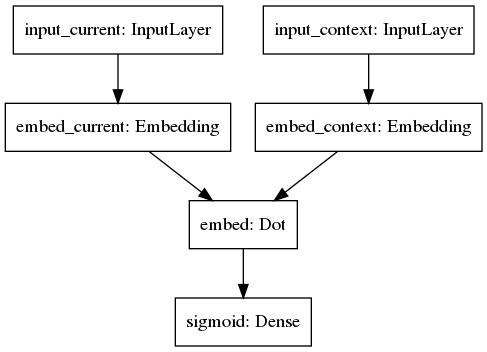

In [41]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [42]:
num_epochs = 5

for epoch in range(num_epochs):
    model.fit(generate_data())

4/4 [==============================] - 0s 2ms/step - loss: 0.7157


### Check word embeddings

In [43]:
[l.name for l in model.layers]

['input_current',
 'input_context',
 'embed_current',
 'embed_context',
 'embed',
 'sigmoid']

In [44]:
# Weights of the target (current) word embedding
E = model.layers[2].get_weights()
E

[array([[ 0.46826714, -0.09341091,  0.36524528,  0.3354109 , -0.62853694],
        [ 0.4128833 ,  0.6300215 , -0.26388356,  0.35105947,  0.47302455],
        [ 0.50917906,  0.35099083,  0.5510756 , -0.64550126,  0.09453968],
        [-0.14981388, -0.07302501,  0.07498515,  0.1698348 , -0.57571954],
        [ 0.4989902 ,  0.18986508, -0.14864095, -0.6351667 ,  0.45919716],
        [-0.17490853, -0.4230209 ,  0.6089475 ,  0.37923753, -0.08205611],
        [ 0.26761794,  0.17720051,  0.03554806,  0.583754  ,  0.46797562]],
       dtype=float32)]

In [45]:
import pandas as pd
df = pd.DataFrame(E[0], index=vocab)
df

,0,1,2,3,4
<UNK>,0.468267,-0.093411,0.365245,0.335411,-0.628537
go,0.412883,0.630022,-0.263884,0.351059,0.473025
kings,0.509179,0.350991,0.551076,-0.645501,0.094540
men,-0.149814,-0.073025,0.074985,0.169835,-0.575720
queens,0.498990,0.189865,-0.148641,-0.635167,0.459197
together,-0.174909,-0.423021,0.608948,0.379238,-0.082056
women,0.267618,0.177201,0.035548,0.583754,0.467976


In [46]:
# Similar words to "queens"
vec = df.loc['queens'].values[:3]

df['distance'] = df.apply(lambda x: cosine(x[:3], vec), axis=1)
df.sort_values(by='distance')

,0,1,2,3,4,distance
queens,0.498990,0.189865,-0.148641,-0.635167,0.459197,0.000000
women,0.267618,0.177201,0.035548,0.583754,0.467976,0.095365
go,0.412883,0.630022,-0.263884,0.351059,0.473025,0.175121
kings,0.509179,0.350991,0.551076,-0.645501,0.094540,0.479800
<UNK>,0.468267,-0.093411,0.365245,0.335411,-0.628537,0.514852
together,-0.174909,-0.423021,0.608948,0.379238,-0.082056,1.611353
men,-0.149814,-0.073025,0.074985,0.169835,-0.575720,1.985030


---

## CBOW from scratch

Source: [The Continuous Bag Of Words (CBOW) Model in NLP](https://analyticsindiamag.com/the-continuous-bag-of-words-cbow-model-in-nlp-hands-on-implementation-with-codes/)

In [47]:
!wget https://raw.githubusercontent.com/bhoomikamadhukar/NLP/master/corona.txt -O corona.txt

--2020-11-28 14:06:25--  https://raw.githubusercontent.com/bhoomikamadhukar/NLP/master/corona.txt
Résolution de raw.githubusercontent.com (raw.githubusercontent.com)… 151.101.120.133
Connexion à raw.githubusercontent.com (raw.githubusercontent.com)|151.101.120.133|:443… connecté.
requête HTTP transmise, en attente de la réponse… 200 OK
Taille : 1205 (1,2K) [text/plain]
Enregistre : «corona.txt»

corona.txt          100%[===================>]   1,18K  --.-KB/s    ds 0s      

2020-11-28 14:06:25 (12,5 MB/s) - «corona.txt» enregistré [1205/1205]



In [48]:
!head corona.txt





The reproductive number – the number of secondary infections generated from one infected individual – is understood to be between 2 and 2.5 for COVID-19 virus, higher than for influenza. However, estimates for both COVID-19 and influenza viruses are very context and time-specific, making direct comparisons more difficult.  

In [49]:
import tensorflow.keras.backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Lambda
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer

In [50]:
vectorize = Tokenizer()

with open('corona.txt','r') as f:
    sentences = [text for text in f if text.count(' ') >= 2]
    vectorize.fit_on_texts(sentences)

    data       = vectorize.texts_to_sequences(sentences)
    vocab_size = len(vectorize.word_index) + 1

vocab_size

103

In [51]:
window_size = 2
vector_size = 100

model = Sequential()

model.add(Embedding(
    input_dim=vocab_size,
    output_dim=vector_size,
    input_length=window_size*2
))
model.add(Lambda(
    lambda x: K.mean(x, axis=1),
    output_shape=(vector_size,)
))
model.add(Dense(
    vocab_size,
    activation='softmax'
))
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 4, 100)            10300     
_________________________________________________________________
lambda (Lambda)              (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 103)               10403     
Total params: 20,703
Trainable params: 20,703
Non-trainable params: 0
_________________________________________________________________


In [52]:
def cbow_model(data, window_size, vocab_size):
    total_length = window_size*2

    # Loop sentences
    for text in data:
        text_len = len(text)

        # Loop current word
        for idx, word in enumerate(text):
            target  = [word]

            # Get context words
            begin   = min(idx - window_size, 0)
            end     = min(idx + window_size + 1, text_len)

            context = [[text[i]
                         for i in range(begin, end)
                         if i != idx]]

            context_ = sequence.pad_sequences(context, maxlen=total_length)
            target_  = to_categorical(target, vocab_size)

            yield(context_, target_) 

In [54]:
num_epochs = 10

for epoch in range(10):
    cost = 0
    for context, current in cbow_model(data, window_size, vocab_size):
        cost += model.train_on_batch(context, current)

    print(epoch, cost)

0 893.509485244751
1 861.2343802452087
2 811.7114593982697
3 753.4938838481903
4 696.3479005098343
5 641.3203747272491
6 587.1116592884064
7 533.7495439052582
8 482.1283251643181
9 433.24124521017075


In [55]:
# Save embeddings
weights = model.get_weights()[0]

f = open('vectors.txt' ,'w')
f.write('{} {}\n'.format(len(vectorize.word_index), vector_size))

for word, i in vectorize.word_index.items():
    f.write('{} {}\n'.format(
        word,
        ' '.join(map(str, list(weights[i, :])))
    ))
f.close()

In [56]:
!head -n 2 vectors.txt

102 100
the -0.05488131 -0.23050767 0.3432513 0.33230445 -0.22281821 0.10457199 -0.06404924 -0.17461057 -0.40597138 -0.42399788 0.61719924 -0.3786851 0.2968675 -0.63962203 0.1659178 -0.48831302 0.10439325 -0.2937706 -0.19074214 -0.581508 0.4318212 -0.053948037 -0.12711203 0.29071498 -0.011745019 0.36633506 0.043478303 0.20287794 0.0002361493 0.26057664 -0.2417944 0.06788564 0.10677692 -0.07283654 -0.09534288 0.32987878 0.2135551 -0.47621754 0.10327092 0.32012042 -0.15416317 0.3006715 0.13319643 0.058463115 0.091162965 0.25433013 0.010104126 -0.121926375 0.16182046 0.1499127 -0.11833822 -0.24839404 0.27036768 0.28653297 0.10840813 0.121522464 -0.39882866 0.15432982 -0.45282605 -0.22696225 0.5189986 -0.13028798 -0.38684195 -0.26182812 0.3189917 0.6064083 -0.054251216 -0.41876674 0.55333257 0.44539213 0.17200229 -0.03611058 0.07110619 0.21874472 -0.44780388 -0.0076681464 0.2757156 0.1936903 0.23932174 -0.33215833 -0.31357375 -0.14005724 0.29270092 0.4368659 -0.1720954 -0.07559237 -0.11585

In [59]:
from gensim.models import KeyedVectors

In [60]:
# Load embeddings into gensim
model = KeyedVectors.load_word2vec_format('vectors.txt', binary=False)
model.most_similar(positive=['transmission'])

[('–transmission', 0.6786088943481445),
 ('speed', 0.6244598627090454),
 ('important', 0.5908088684082031),
 ('major', 0.5672246217727661),
 ('difference', 0.4876672029495239),
 ('symptoms', 0.473138689994812),
 ('driver', 0.4378052353858948),
 ('or', 0.43168097734451294),
 ('point', 0.38322970271110535),
 ('appearance', 0.3795529007911682)]

---

## word2phrase

The [second word2vec paper](http://arxiv.org/pdf/1310.4546.pdf) also includes one more innovation worth discussing. The authors pointed out that a word pair like “Boston Globe” (a newspaper) has a much different meaning than the individual words “Boston” and “Globe”. So it makes sense to treat “Boston Globe”, wherever it occurs in the text, as a single word with its own word vector representation. Phrase detection is covered in the “Learning Phrases” section of their paper.

More about it: [Word Pairs and “Phrases”](http://mccormickml.com/2017/01/11/word2vec-tutorial-part-2-negative-sampling/#word-pairs-and-phrases)